In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Load the data

In [5]:
file_path = 'D:\Project\TSLA.csv'  # Update with the actual file path
data = pd.read_csv(file_path)

# Preprocess the data

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Create lag features

In [7]:
data['Prev_Close'] = data['Close'].shift(1)
data['Rolling_Mean_7'] = data['Close'].rolling(window=7).mean()
data['Rolling_Mean_30'] = data['Close'].rolling(window=30).mean()

# Drop rows with NaN values (caused by shifting and rolling operations)

In [8]:
data.dropna(inplace=True)

# Define features and target

In [9]:
X = data[['Open', 'High', 'Low', 'Volume', 'Prev_Close', 'Rolling_Mean_7', 'Rolling_Mean_30']]
y = data['Close']

# Split into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Build the model

In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Predict and evaluate

In [12]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 164.61546497783712


# Calculate RMSE, MAE, and R-squared

In [13]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted values

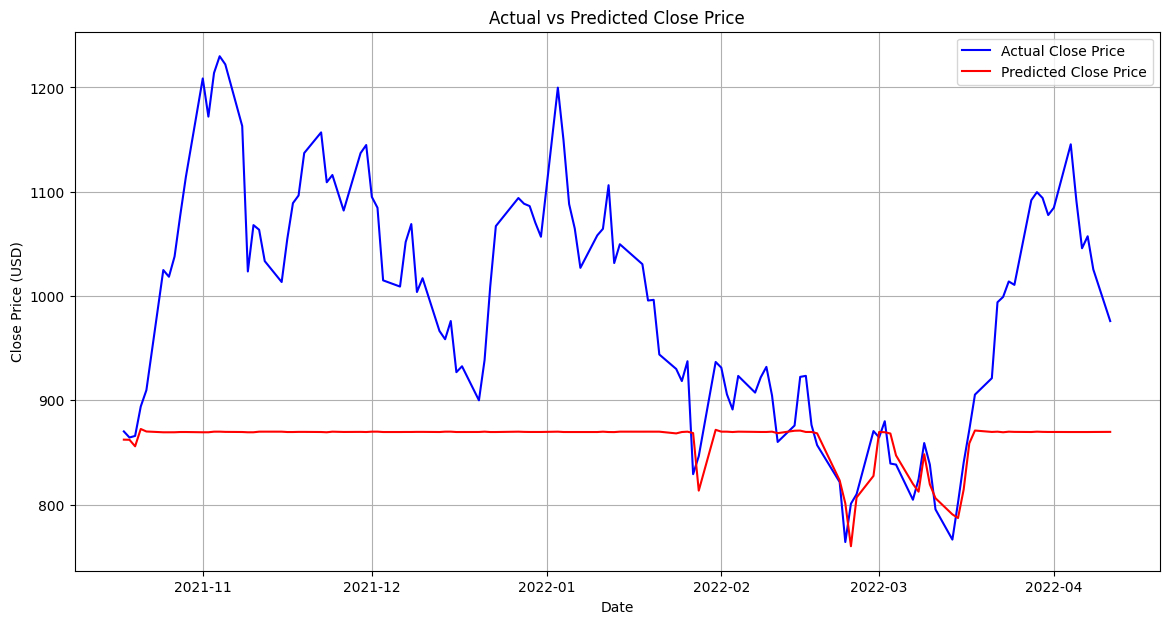

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', color='red')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()